![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [78]:
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [80]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


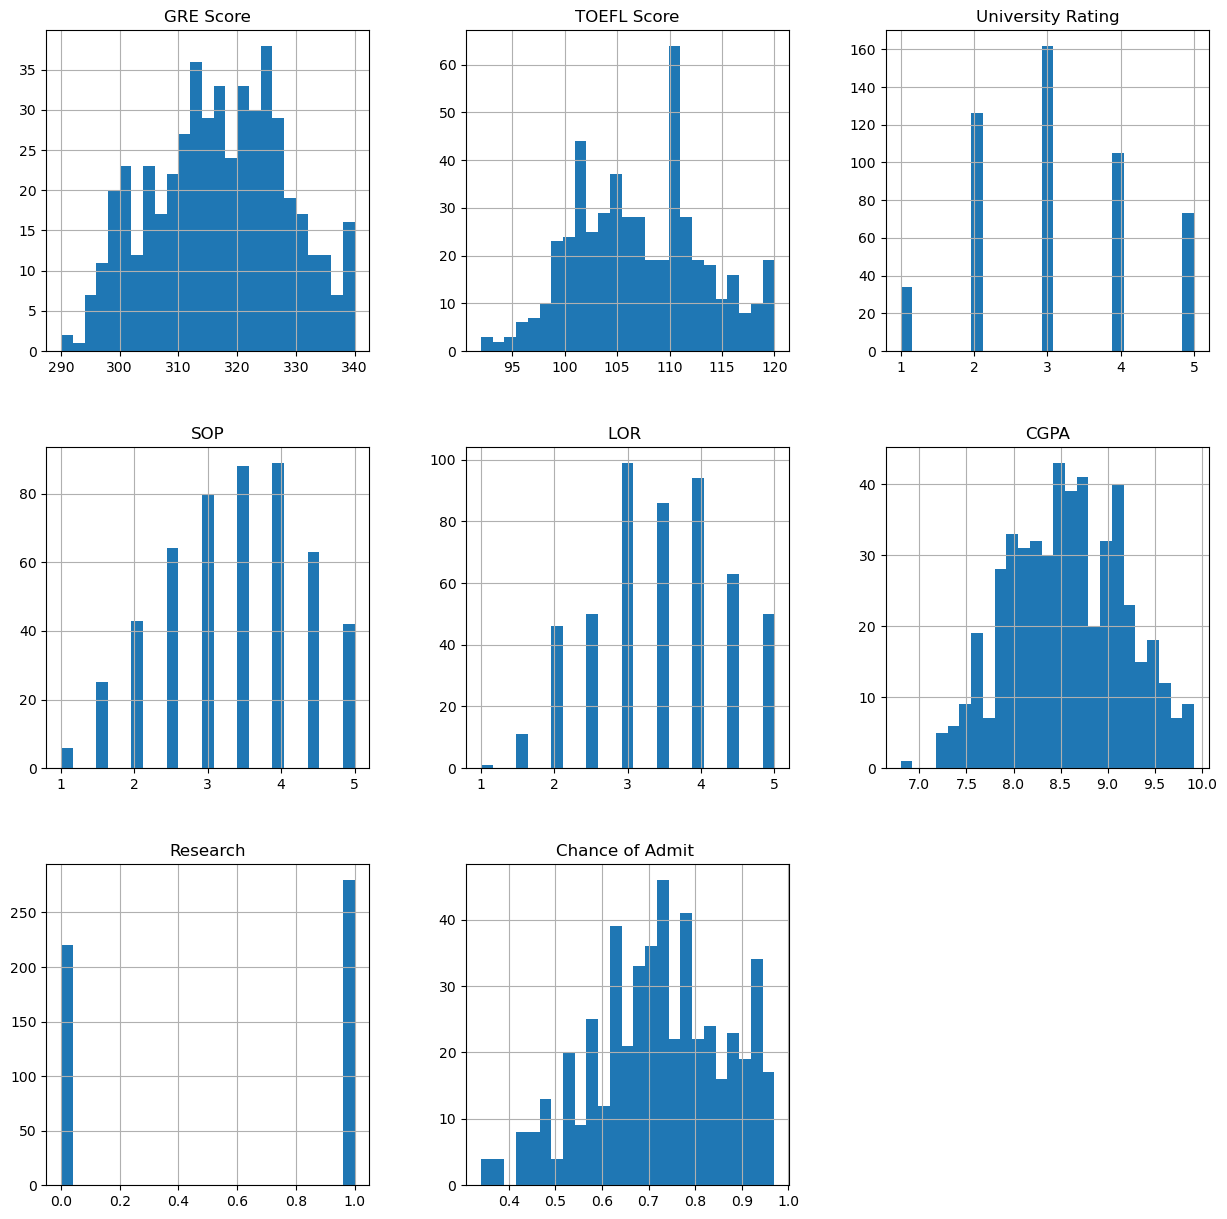

In [81]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [82]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [83]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [84]:
# Celda 1


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [85]:
# Celda 2


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [86]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from keras.callbacks import EarlyStopping

In [87]:
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

In [88]:
# Celda 3

output_var = 1
dims = X_train.shape[1]

K.clear_session()

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(dims,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_var, activation='linear'))

print (model.summary())



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


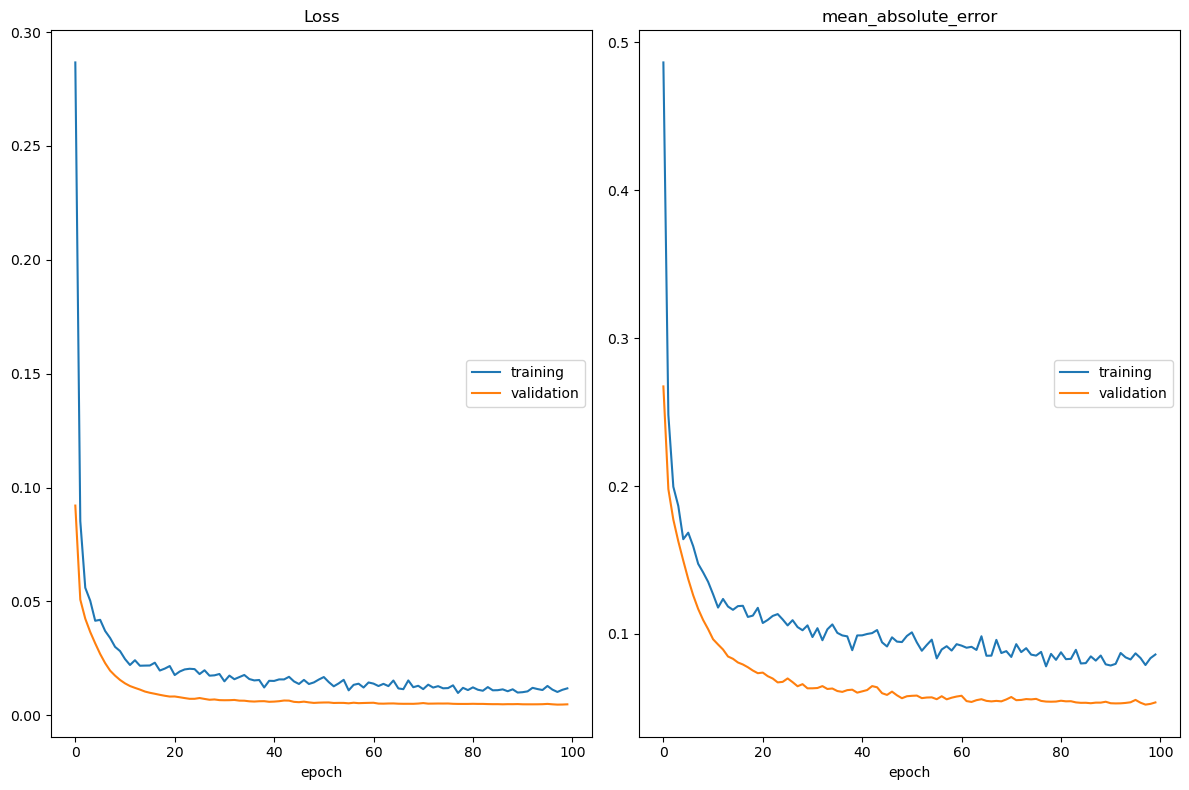

Loss
	training         	 (min:    0.010, max:    0.287, cur:    0.012)
	validation       	 (min:    0.005, max:    0.092, cur:    0.005)
mean_absolute_error
	training         	 (min:    0.078, max:    0.486, cur:    0.086)
	validation       	 (min:    0.052, max:    0.267, cur:    0.054)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - mean_absolute_error: 0.0872 - val_loss: 0.0048 - val_mean_absolute_error: 0.0538


In [89]:
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks=[early_stopping, PlotLossesKeras()])



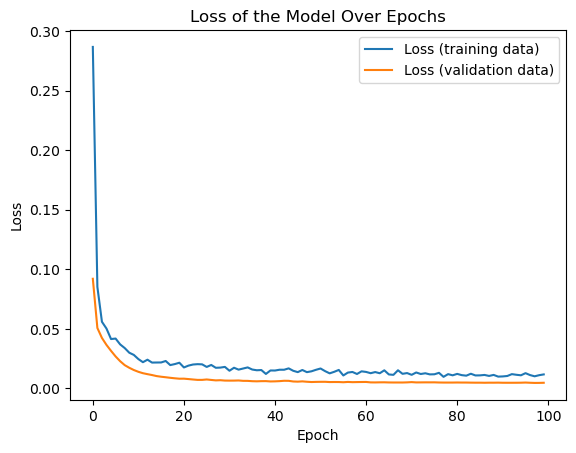

Mean Absolute Error (MAE) on Test set: 0.052272625267505646
Mean Squared Error (MSE) on Test set: 0.004674583673477173


In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss of the Model Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

test_metrics = model.evaluate(X_test, Y_test, verbose=0)
print(f'Mean Absolute Error (MAE) on Test set: {test_metrics[1]}')
print(f'Mean Squared Error (MSE) on Test set: {test_metrics[0]}')


#### 1. Arquitectura del Modelo
* En la celda anterior, se definió la arquitectura del modelo, empleando dos capas ocultas de 256 neuronas cada una, al igual que el punto dos, lo que nos permite realizar una comparativa entre modelos. 
La función de activación es "relu", o Rectified Lineal Unit. Se utilizó para las capas ocultas la función ReLU debido a que esta mantiene el gradiente durante el entrenamiento y actualiza los pesos, lo que mejora la convergencia del modelo. Finalmente se usa la función "linear" para la capa de salida.

#### 2. Regularización (Dropout)
* Se implementa una tasa de dropout de 0.2 para el modelo, lo cual evita que el modelo "memorice" los datos y el sobreajuste.

#### 3. Compilación del Modelo
* Se utilizó el optimizador Descenso de Gradiente Estocástico (SGD, por sus siglas en inglés) debido a su buena capacidad de escapar de los mínimos locales a los que se enfrentan este tipo de problemas a la hora de entrenar, además, es uno de los optimizadores mas utilizados. 

#### 4. Early Stopping
* Se agregó early Stopping al modelo dado que monitorizar el val_loss permite detener el entrenamiento cuando este valor deja de mejorar, indicando que el modelo puede estar empezando a sobreajustar. La paciencia de 10 épocas es un buen equilibrio que permite a algunas fluctuaciones ocurrir sin detener el entrenamiento prematuramente.


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [91]:
# Celda 4
